# Getting your Yelp API key

Get your API keys at: https://www.yelp.com/developers/v3/manage_app, you may need to first create a Yelp account.

Fill out the app form, it doesn't really matter what you put - use your own email address and contact details.



<img src="yelp2.png" alt="Yelp" style="width:800px;">

You should end up on this page:

<img src="yelp3.png" alt="Yelp" style="width:800px;">

Make note of both the **client ID and secret key** (click on show). Record and save both of these things somewhere where you'll remember.


# Note your access is limited: you can call the API 25k times a day. 

<img src="yelp1.png" alt="Yelp" style="width:800px;">

This means that you can, at most, request 25k things from Yelp each day. Be aware of this when you complete your assignment.

# What is an API
API is the abbreviation for application protocol interface. This is basically your way of interacting with applications (typically web based). Sometimes they're very easy to use (like changing a component of the URL), sometimes they're more involved (like FB API). Why might we want to do this?

## A lot of useful software and data is accessible through API's
1. Twitter (https://dev.twitter.com/rest/public)

    a. Stream tweets
    
    b. Post tweets
    
    c. Follow/retweet (build bots)
    
2. Facebook (https://developers.facebook.com)
    
    a. Get insights on page/app
    
    b. Build chat bots
    
    c. Build authentication app (FB login)
    
    d. much more...
    
3. Instagram (https://www.instagram.com/developer/)
    
    a. Analytics on Instagram data
    
    b. Figure out Instagram influencers
    
4. OMDB (http://www.omdbapi.com)
    
    a. Collect data on movies
    
    b. Help build a recommender system!
    
5. Yelp (https://www.yelp.com/developers/documentation/v2/overview)
    
    a. Collect venue data
    
    b. Get review snippets and overall ratings
    
6. Google services (maps, translation, etc.) (https://developers.google.com/products/)
    
    a. Google has all sorts of cool stuff...
    
    b. But you pay a hefty price sometimes
    
7. Leaflet (For making free maps) (http://leafletjs.com)
    
    a. Make cool maps!
    
And many more...


Most of the API's have their own unique "language," but many companies build wrappers in Python for you to use. If the developer itself hasn't built wrappers in Python, someone else probably has (Leaflet is in JavaScript, but Folium is a parallel project that produces a Python interface to Leaflet).

Leveraging the servies available online allows us to do a lot more with our own programs. Don't need to reinvent the wheel!

# API usage: 3rd party Yelp-Fusion GitHub page

Go to terminal/command prompt and install yelpapi package using:

`pip intall yelpapi`

In [2]:
from yelpapi import YelpAPI

## First let's specify some credentials/access points

In [24]:
# Save a config file so your secret key doesn't have to be kept in code
# You only want to do this once.
import json, codecs
if 1==0:
    with codecs.open('./config.json', 'w', encoding = 'utf-8') as f:
        f.write(json.dumps({u'ID':'your Id here', 
                            u'KEY':'your secret key here', 
                            'API_KEY':'your api key'}))

In [15]:
# Read in a saved config file
with codecs.open('./config.json', 'r', encoding = 'utf-8') as f:
    credentials = json.loads(f.read())
CLIENT_ID = credentials[u'ID']
CLIENT_SECRET = credentials[u'KEY']
API_KEY = credentials[u'API_KEY']

In [16]:
CLIENT_ID

u'tE7KWbN2DH_LAw_I2J4HLQ'

### The API has the following methods (functions):

* Search API: 
```python 
search_query(args)
```

* Phone Search API: 
```python 
phone_search_query(phone=[PHONE_NUMBER], other_args)
```

* Transaction Search API: 
```python
transaction_search_query(transaction_type=[TRANSACTION_TYPE], other_args)
```

* Business API: 
```python
business_query(id=[BUSINESS_ID], other_args)
```

* Reviews API: 
```python
reviews_query(id=[BUSINESS_ID], other_args)
```

* Autocomplete API: 
```python
autocomplete_query(text=[SEARCH_TEXT], other_args)
```

In [25]:
# First initiate a connection using your ID and key
yelp_api = YelpAPI(API_KEY)

In [26]:
results = yelp_api.search_query(term='restaurants', longitude=-106.4850, latitude=31.7619, radius =40000, limit = 50)

In [27]:
# the result is a dictionary, let's look at keys
results.keys()

[u'region', u'total', u'businesses']

In [29]:
results['region']

{u'center': {u'latitude': 31.7619, u'longitude': -106.485}}

In [30]:
results['total'] # total number of results

1600

In [31]:
len(results['businesses']) # why isn't it the same?

50

In [32]:
results['businesses'] # Returns a list of dictionaries

[{u'categories': [{u'alias': u'tapas', u'title': u'Tapas Bars'},
   {u'alias': u'newamerican', u'title': u'American (New)'}],
  u'coordinates': {u'latitude': 31.7570171185135,
   u'longitude': -106.493828729608},
  u'display_phone': u'(915) 533-8935',
  u'distance': 995.637181212,
  u'id': u'tabla-el-paso',
  u'image_url': u'https://s3-media1.fl.yelpcdn.com/bphoto/mwfT1VNbbyxCGagraEcrQQ/o.jpg',
  u'is_closed': False,
  u'location': {u'address1': u'115 S Durango St',
   u'address2': u'Ste D',
   u'address3': u'',
   u'city': u'El Paso',
   u'country': u'US',
   u'display_address': [u'115 S Durango St', u'Ste D', u'El Paso, TX 79901'],
   u'state': u'TX',
   u'zip_code': u'79901'},
  u'name': u'Tabla',
  u'phone': u'+19155338935',
  u'price': u'$$',
  u'rating': 4.5,
  u'review_count': 230,
  u'transactions': [],
  u'url': u'https://www.yelp.com/biz/tabla-el-paso?adjust_creative=tE7KWbN2DH_LAw_I2J4HLQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tE7KWbN2DH_LAw_I2

In [33]:
results['businesses'][0] # let's look at the first one

{u'categories': [{u'alias': u'tapas', u'title': u'Tapas Bars'},
  {u'alias': u'newamerican', u'title': u'American (New)'}],
 u'coordinates': {u'latitude': 31.7570171185135,
  u'longitude': -106.493828729608},
 u'display_phone': u'(915) 533-8935',
 u'distance': 995.637181212,
 u'id': u'tabla-el-paso',
 u'image_url': u'https://s3-media1.fl.yelpcdn.com/bphoto/mwfT1VNbbyxCGagraEcrQQ/o.jpg',
 u'is_closed': False,
 u'location': {u'address1': u'115 S Durango St',
  u'address2': u'Ste D',
  u'address3': u'',
  u'city': u'El Paso',
  u'country': u'US',
  u'display_address': [u'115 S Durango St', u'Ste D', u'El Paso, TX 79901'],
  u'state': u'TX',
  u'zip_code': u'79901'},
 u'name': u'Tabla',
 u'phone': u'+19155338935',
 u'price': u'$$',
 u'rating': 4.5,
 u'review_count': 230,
 u'transactions': [],
 u'url': u'https://www.yelp.com/biz/tabla-el-paso?adjust_creative=tE7KWbN2DH_LAw_I2J4HLQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tE7KWbN2DH_LAw_I2J4HLQ'}

In [34]:
keys = results['businesses'][0].keys() # these are the keys from one listing
keys

[u'rating',
 u'review_count',
 u'name',
 u'transactions',
 u'url',
 u'price',
 u'distance',
 u'coordinates',
 u'phone',
 u'image_url',
 u'categories',
 u'display_phone',
 u'id',
 u'is_closed',
 u'location']

In [35]:
results['businesses'][0]['phone'], results['businesses'][0]['display_phone']

(u'+19155338935', u'(915) 533-8935')

In [37]:
# Get list of business names and ratings
[[b['name'], b['rating']] for b in results['businesses']]
# How does the above code work?

[[u'Tabla', 4.5],
 [u'Park Tavern', 4.5],
 [u'Anson Eleven', 4.0],
 [u'The Pot Au Feu', 4.5],
 [u'Craft and Social', 4.5],
 [u"Mac's Place Downtown", 4.5],
 [u'L & J Cafe', 4.5],
 [u'Crave Kitchen and Bar', 4.0],
 [u'El Tenedor', 4.0],
 [u'The Downtowner', 4.0],
 [u'The Avocado Cafe', 5.0],
 [u'Circa 1963', 3.0],
 [u'Desert Moon Cafe', 5.0],
 [u'Delight', 4.0],
 [u'Cafe Central', 3.5],
 [u'Blackbird Cantina Deluxe', 4.5],
 [u'Healthy Bite', 4.5],
 [u'The Hoppy Monk - El Paso', 4.5],
 [u'Los Colorines', 4.0],
 [u'Craft Cafe', 4.5],
 [u'The Tap', 4.0],
 [u'Crepe & Co', 4.5],
 [u'Porkies BBQ Smokehouse', 5.0],
 [u'Pallets - Flair Cocktails', 4.0],
 [u"Tommy's Pit BBQ", 4.5],
 [u'El Jacalito Restaurante', 4.5],
 [u'The El Paso Club', 4.5],
 [u"Lucy's Coffee Shop", 4.5],
 [u'The Fire Restaurant', 3.0],
 [u'House of Pizza Downtown', 4.0],
 [u'Savage Goods', 4.5],
 [u'G2 Geogeske', 3.5],
 [u'Cafe Istanbul Mediterranean', 4.0],
 [u"Ardovino's Pizza", 4.0],
 [u'El Tragadero', 4.0],
 [u'Kaedama'

In [38]:
# Convert to a dataframe
import pandas as pd
df = pd.DataFrame([[b['name'], b['rating']] for b in results['businesses']])
df.columns = ['name', 'rating']

In [39]:
df.head()

,name,rating
0,Tabla,4.5
1,Park Tavern,4.5
2,Anson Eleven,4.0
3,The Pot Au Feu,4.5
4,Craft and Social,4.5


# How would you construct a dataframe with all of the fields?

In [40]:
# Write your code here..
lj = results['businesses'][0]
lj

{u'categories': [{u'alias': u'tapas', u'title': u'Tapas Bars'},
  {u'alias': u'newamerican', u'title': u'American (New)'}],
 u'coordinates': {u'latitude': 31.7570171185135,
  u'longitude': -106.493828729608},
 u'display_phone': u'(915) 533-8935',
 u'distance': 995.637181212,
 u'id': u'tabla-el-paso',
 u'image_url': u'https://s3-media1.fl.yelpcdn.com/bphoto/mwfT1VNbbyxCGagraEcrQQ/o.jpg',
 u'is_closed': False,
 u'location': {u'address1': u'115 S Durango St',
  u'address2': u'Ste D',
  u'address3': u'',
  u'city': u'El Paso',
  u'country': u'US',
  u'display_address': [u'115 S Durango St', u'Ste D', u'El Paso, TX 79901'],
  u'state': u'TX',
  u'zip_code': u'79901'},
 u'name': u'Tabla',
 u'phone': u'+19155338935',
 u'price': u'$$',
 u'rating': 4.5,
 u'review_count': 230,
 u'transactions': [],
 u'url': u'https://www.yelp.com/biz/tabla-el-paso?adjust_creative=tE7KWbN2DH_LAw_I2J4HLQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tE7KWbN2DH_LAw_I2J4HLQ'}

In [41]:
[lj[k] for k in lj.keys()]

[4.5,
 230,
 u'Tabla',
 [],
 u'https://www.yelp.com/biz/tabla-el-paso?adjust_creative=tE7KWbN2DH_LAw_I2J4HLQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tE7KWbN2DH_LAw_I2J4HLQ',
 u'$$',
 995.637181212,
 {u'latitude': 31.7570171185135, u'longitude': -106.493828729608},
 u'+19155338935',
 u'https://s3-media1.fl.yelpcdn.com/bphoto/mwfT1VNbbyxCGagraEcrQQ/o.jpg',
 [{u'alias': u'tapas', u'title': u'Tapas Bars'},
  {u'alias': u'newamerican', u'title': u'American (New)'}],
 u'(915) 533-8935',
 u'tabla-el-paso',
 False,
 {u'address1': u'115 S Durango St',
  u'address2': u'Ste D',
  u'address3': u'',
  u'city': u'El Paso',
  u'country': u'US',
  u'display_address': [u'115 S Durango St', u'Ste D', u'El Paso, TX 79901'],
  u'state': u'TX',
  u'zip_code': u'79901'}]

In [46]:
r1 = results['businesses'][0]
def _try_iter_(d,k, errval = None):
    try:
        return d[k]
    except:
        return errval

In [47]:
res1 = pd.DataFrame([[_try_iter_(biz, k) for k in r1.keys()] for biz in results['businesses']])
res1.columns = lj.keys()

In [48]:
res1.head()

,rating,review_count,name,transactions,url,price,distance,coordinates,phone,image_url,categories,display_phone,id,is_closed,location
0,4.5,230,Tabla,[],https://www.yelp.com/biz/tabla-el-paso?adjust_...,$$,995.637181,"{u'latitude': 31.7570171185, u'longitude': -10...",+19155338935,https://s3-media1.fl.yelpcdn.com/bphoto/mwfT1V...,"[{u'alias': u'tapas', u'title': u'Tapas Bars'}...",(915) 533-8935,tabla-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'1..."
1,4.5,42,Park Tavern,[],https://www.yelp.com/biz/park-tavern-el-paso?a...,$$,344.838400,"{u'latitude': 31.75959, u'longitude': -106.48735}",+19152289050,https://s3-media2.fl.yelpcdn.com/bphoto/WvXaXZ...,"[{u'alias': u'newamerican', u'title': u'Americ...",(915) 228-9050,park-tavern-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'2..."
2,4.0,214,Anson Eleven,[],https://www.yelp.com/biz/anson-eleven-el-paso-...,$$,495.239688,"{u'latitude': 31.759125, u'longitude': -106.48...",+19155046400,https://s3-media1.fl.yelpcdn.com/bphoto/fVIoij...,"[{u'alias': u'newamerican', u'title': u'Americ...",(915) 504-6400,anson-eleven-el-paso-4,False,"{u'city': u'El Paso', u'display_address': [u'3..."
3,4.5,145,The Pot Au Feu,[],https://www.yelp.com/biz/the-pot-au-feu-el-pas...,$$,286.372622,"{u'latitude': 31.7617606, u'longitude': -106.4...",+19155038158,https://s3-media4.fl.yelpcdn.com/bphoto/XAJrcL...,"[{u'alias': u'breakfast_brunch', u'title': u'B...",(915) 503-8158,the-pot-au-feu-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'3..."
4,4.5,125,Craft and Social,[],https://www.yelp.com/biz/craft-and-social-el-p...,$$,299.648422,"{u'latitude': 31.7617532, u'longitude': -106.4...",+19152197141,https://s3-media1.fl.yelpcdn.com/bphoto/snHFwZ...,"[{u'alias': u'pubs', u'title': u'Pubs'}, {u'al...",(915) 219-7141,craft-and-social-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'3..."


In [49]:
res1['longitude'] = res1.coordinates.apply(lambda x: _try_iter_(x, 'longitude'))
res1['latitude'] = res1.coordinates.apply(lambda x: _try_iter_(x, 'latitude'))

### Get next batch of results

In [51]:
for off in range(0, 151, 50):
    print(off)

0
50
100
150


In [52]:
results2 = yelp_api.search_query(term='restaurants', longitude=-106.4850, latitude=31.7619,limit=50, radius =40000, offset=150)

In [53]:
r1 = results['businesses'][0]
res2 = pd.DataFrame([[_try_iter_(biz, k) for k in lj.keys()] for biz in results2['businesses']])
res2.columns = lj.keys()
res2.head()

,rating,review_count,name,transactions,url,price,distance,coordinates,phone,image_url,categories,display_phone,id,is_closed,location
0,5.0,2,La Pila,[],https://www.yelp.com/biz/la-pila-ciudad-ju%C3%...,$,3487.584621,"{u'latitude': 31.7348878578, u'longitude': -10...",,https://s3-media1.fl.yelpcdn.com/bphoto/Sx7HhH...,"[{u'alias': u'mexican', u'title': u'Mexican'}]",,la-pila-ciudad-juárez,False,"{u'city': u'Ciudad Juárez', u'display_address'..."
1,3.0,43,Johnny Rockets,"[delivery, pickup]",https://www.yelp.com/biz/johnny-rockets-el-pas...,$,1882.402833,"{u'latitude': 31.7729808011, u'longitude': -10...",+19152013290,https://s3-media3.fl.yelpcdn.com/bphoto/qJ0n34...,"[{u'alias': u'tradamerican', u'title': u'Ameri...",(915) 201-3290,johnny-rockets-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'2..."
2,4.5,18,Dona Lupe Cafe,[],https://www.yelp.com/biz/dona-lupe-cafe-el-pas...,$,3458.763594,"{u'latitude': 31.7848716, u'longitude': -106.4...",+19155669833,https://s3-media1.fl.yelpcdn.com/bphoto/w0NGYn...,"[{u'alias': u'mexican', u'title': u'Mexican'}]",(915) 566-9833,dona-lupe-cafe-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'2..."
3,5.0,3,One Grub Community,[],https://www.yelp.com/biz/one-grub-community-el...,None,1054.168008,"{u'latitude': 31.756710794, u'longitude': -106...",+19155887078,https://s3-media1.fl.yelpcdn.com/bphoto/licw4o...,"[{u'alias': u'farmersmarket', u'title': u'Farm...",(915) 588-7078,one-grub-community-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'1..."
4,3.5,46,Chipotle Mexican Grill,[],https://www.yelp.com/biz/chipotle-mexican-gril...,$,2642.293592,"{u'latitude': 31.7790756226, u'longitude': -10...",+19153519361,https://s3-media1.fl.yelpcdn.com/bphoto/1i2kag...,"[{u'alias': u'mexican', u'title': u'Mexican'},...",(915) 351-9361,chipotle-mexican-grill-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'2..."


In [54]:
finalres = pd.concat([res1, res1])
finalres.head()

,rating,review_count,name,transactions,url,price,distance,coordinates,phone,image_url,categories,display_phone,id,is_closed,location,longitude,latitude
0,4.5,230,Tabla,[],https://www.yelp.com/biz/tabla-el-paso?adjust_...,$$,995.637181,"{u'latitude': 31.7570171185, u'longitude': -10...",+19155338935,https://s3-media1.fl.yelpcdn.com/bphoto/mwfT1V...,"[{u'alias': u'tapas', u'title': u'Tapas Bars'}...",(915) 533-8935,tabla-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'1...",-106.493829,31.757017
1,4.5,42,Park Tavern,[],https://www.yelp.com/biz/park-tavern-el-paso?a...,$$,344.838400,"{u'latitude': 31.75959, u'longitude': -106.48735}",+19152289050,https://s3-media2.fl.yelpcdn.com/bphoto/WvXaXZ...,"[{u'alias': u'newamerican', u'title': u'Americ...",(915) 228-9050,park-tavern-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'2...",-106.487350,31.759590
2,4.0,214,Anson Eleven,[],https://www.yelp.com/biz/anson-eleven-el-paso-...,$$,495.239688,"{u'latitude': 31.759125, u'longitude': -106.48...",+19155046400,https://s3-media1.fl.yelpcdn.com/bphoto/fVIoij...,"[{u'alias': u'newamerican', u'title': u'Americ...",(915) 504-6400,anson-eleven-el-paso-4,False,"{u'city': u'El Paso', u'display_address': [u'3...",-106.489095,31.759125
3,4.5,145,The Pot Au Feu,[],https://www.yelp.com/biz/the-pot-au-feu-el-pas...,$$,286.372622,"{u'latitude': 31.7617606, u'longitude': -106.4...",+19155038158,https://s3-media4.fl.yelpcdn.com/bphoto/XAJrcL...,"[{u'alias': u'breakfast_brunch', u'title': u'B...",(915) 503-8158,the-pot-au-feu-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'3...",-106.488132,31.761761
4,4.5,125,Craft and Social,[],https://www.yelp.com/biz/craft-and-social-el-p...,$$,299.648422,"{u'latitude': 31.7617532, u'longitude': -106.4...",+19152197141,https://s3-media1.fl.yelpcdn.com/bphoto/snHFwZ...,"[{u'alias': u'pubs', u'title': u'Pubs'}, {u'al...",(915) 219-7141,craft-and-social-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'3...",-106.488144,31.761753


# Try another API: Folium
First things first, make sure you have it installed:
Go to console/terminal and execute: `pip install folium`

In [55]:
# simulate a bunch of latitudes/longitudes
import folium
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt
np.random.seed(1000) # This makes sure we get the same "random numbers"
latlngs = [(31.7619+np.random.normal()/10, -106.4850+np.random.normal()/10) for v in range(0,20)]
latlngs

[(31.68145416964752, -106.45290684529101),
 (31.759351711952792, -106.42056761715732),
 (31.7318203327213, -106.44605254457127),
 (31.75115626983091, -106.53299830753608),
 (31.821403550207656, -106.53146675261954),
 (31.828628130698803, -106.56561156104425),
 (31.642293016616716, -106.525596016136),
 (31.743662265962737, -106.4746807105965),
 (31.748057801141425, -106.4144307625041),
 (31.889079527640746, -106.58367473287973),
 (31.728416454678847, -106.49494816980098),
 (31.802619210034152, -106.39306124607955),
 (31.79311180100664, -106.3316838934642),
 (31.70688261349717, -106.52331474108843),
 (31.679605903656093, -106.32499166319393),
 (31.754971870107408, -106.47667905078562),
 (31.729207532482363, -106.48957971880073),
 (31.73145399383031, -106.29269898696),
 (31.75403409964982, -106.5432065722565),
 (31.60010177638833, -106.39827391827222)]

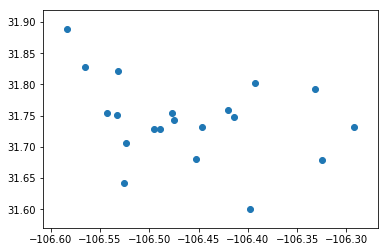

In [56]:
plt.scatter(zip(*latlngs)[1],zip(*latlngs)[0])

## The first step is to define a folium map object

Some of the basic arguments taken by the map function are:

```Python
map2 = folium.Map(location=[latcenter, lngcenter], zoom_start=12,tiles='OpenStreetMap', width=width, height=height)
```

In [57]:
latcenter = np.mean(zip(*latlngs)[0])
lngcenter = np.mean(zip(*latlngs)[1])
width = 700 # These are pixels
height = 400 # these are pixels
## What's the pixel resolution of a standard HD monitor?

In [58]:
params = {
    'location':[latcenter, lngcenter],
    'zoom_start':12,
    'tiles':'OpenStreetMap'
}

In [59]:
params['zoom_start'] = 10
map2 = folium.Map(**params)
map2

In [60]:
params['tiles'] = 'Stamen Terrain'
map2 = folium.Map(**params)
map2

In [61]:
params['tiles'] = 'Stamen Toner'
map2 = folium.Map(**params)
map2

In [62]:
params['tiles'] = 'Stamen Watercolor'
map2 = folium.Map(**params)
map2

In [63]:
params['tiles'] = 'CartoDB positron'
map2 = folium.Map(**params)
map2

In [64]:
params['tiles'] = 'CartoDB dark_matter'
map2 = folium.Map(**params)
map2

## Okay, now do we plot polygon markers?
### Here are some parameters for each marker
```python
marker_params = {
    'location':[lat, lng],
    'fill_color':fillcolor,
    'color':boundarycolor,
    'fill_opacity':opacityoffill,
    'opacity':opacityofboundary,
    'number_of_sides':numofsides,
    'radius':radius
}
```

In [65]:
# Let's initialize the parameters
marker_params = {
    'location':[0, 0],
    'fill_color':'green',
    'color':'black',
    'fill_opacity':.1,
    'opacity':1,
    'number_of_sides':5,
    'radius':10
}

In [66]:
params['tiles'] = 'OpenStreetMap'
map2 = folium.Map(**params)
marker_params['fill_opacity']=.3
for ll in latlngs:
    marker_params['location']=ll
    marker_params['number_of_sides']=np.random.randint(3,7)
    folium.RegularPolygonMarker(**marker_params).add_to(map2)
map2

## Ok, what if I want to change the shape/color/opacity of the marker depending on some data for each point?

Let's first make up some data for each location

In [67]:
# create a dataframe first
df = pd.DataFrame(latlngs)
df.columns = ['lat', 'lng']
df.head()

,lat,lng
0,31.681454,-106.452907
1,31.759352,-106.420568
2,31.731820,-106.446053
3,31.751156,-106.532998
4,31.821404,-106.531467


In [68]:
np.random.seed(999)
df['x1'] = np.random.randint(1,10, len(df)) # create variable "x1" with random values betwen 1 and 10
df['x2'] = np.random.randint(50,300, len(df)) # create a variable "x2" with random values between 50 and 300
df.head()

,lat,lng,x1,x2
0,31.681454,-106.452907,1,195
1,31.759352,-106.420568,6,240
2,31.731820,-106.446053,2,279
3,31.751156,-106.532998,9,165
4,31.821404,-106.531467,2,152


#### Let's take x1 (goes from 1 to 10), and map it onto color.
```python
from matplotlib import cm
cmap = cm.get_cmap('RdYlGn')
```

cmap is a mapping from 0 to 1 to some colors in hex or (r,g,b) format, we just need to convert our 1 through 10 values to 0-1 values. How do we do that?


In [69]:
from __future__ import division
from matplotlib import cm
from matplotlib.colors import rgb2hex
cmap = cm.get_cmap('RdYlGn')
def _cmaphex_(val, valmap=None, params=None):
    if valmap == None:
        return rgb2hex(cmap(val)[:3])
    else:
        return rgb2hex(cmap(valmap(val, **params))[:3])

In [70]:
df['colors']=df.x1.apply(lambda x: _cmaphex_((x-1)/8))
# this is a linear mapping (preserves proportional distance)
df.head()

,lat,lng,x1,x2,colors
0,31.681454,-106.452907,1,195,#a50026
1,31.759352,-106.420568,6,240,#cbe982
2,31.731820,-106.446053,2,279,#de402e
3,31.751156,-106.532998,9,165,#006837
4,31.821404,-106.531467,2,152,#de402e


### Let's color the markers!

In [71]:
d = df.index[0]
dat = df.loc[d,:]
dat['colors']

u'#a50026'

In [72]:
params['tiles'] = 'OpenStreetMap'
marker_params['fill_opacity'] = .5
map2 = folium.Map(**params)
for d in df.index:
    dat = df.loc[d,:]
    marker_params['location'] = (dat['lat'],dat['lng'])
    marker_params['fill_color'] = dat['colors']
    folium.RegularPolygonMarker(**marker_params).add_to(map2)
map2

# Now your turn, this is the first part of your hwk assignment.

Create a meaningful map of 50 restaurants in El Paso. Style points for creativity.

** Highly suggest that you save your Yelp Data somewhere so you don't have to access the API to get to it every time you work on this.**

Must include a popup. Figure it out using the Folium API documentation. The popup can include embedded HTML code, Google for examples. You can display all sorts of information about these restaurants that you got from Yelp (or elsewhere). 

In [73]:
res1.head()

,rating,review_count,name,transactions,url,price,distance,coordinates,phone,image_url,categories,display_phone,id,is_closed,location,longitude,latitude
0,4.5,230,Tabla,[],https://www.yelp.com/biz/tabla-el-paso?adjust_...,$$,995.637181,"{u'latitude': 31.7570171185, u'longitude': -10...",+19155338935,https://s3-media1.fl.yelpcdn.com/bphoto/mwfT1V...,"[{u'alias': u'tapas', u'title': u'Tapas Bars'}...",(915) 533-8935,tabla-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'1...",-106.493829,31.757017
1,4.5,42,Park Tavern,[],https://www.yelp.com/biz/park-tavern-el-paso?a...,$$,344.838400,"{u'latitude': 31.75959, u'longitude': -106.48735}",+19152289050,https://s3-media2.fl.yelpcdn.com/bphoto/WvXaXZ...,"[{u'alias': u'newamerican', u'title': u'Americ...",(915) 228-9050,park-tavern-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'2...",-106.487350,31.759590
2,4.0,214,Anson Eleven,[],https://www.yelp.com/biz/anson-eleven-el-paso-...,$$,495.239688,"{u'latitude': 31.759125, u'longitude': -106.48...",+19155046400,https://s3-media1.fl.yelpcdn.com/bphoto/fVIoij...,"[{u'alias': u'newamerican', u'title': u'Americ...",(915) 504-6400,anson-eleven-el-paso-4,False,"{u'city': u'El Paso', u'display_address': [u'3...",-106.489095,31.759125
3,4.5,145,The Pot Au Feu,[],https://www.yelp.com/biz/the-pot-au-feu-el-pas...,$$,286.372622,"{u'latitude': 31.7617606, u'longitude': -106.4...",+19155038158,https://s3-media4.fl.yelpcdn.com/bphoto/XAJrcL...,"[{u'alias': u'breakfast_brunch', u'title': u'B...",(915) 503-8158,the-pot-au-feu-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'3...",-106.488132,31.761761
4,4.5,125,Craft and Social,[],https://www.yelp.com/biz/craft-and-social-el-p...,$$,299.648422,"{u'latitude': 31.7617532, u'longitude': -106.4...",+19152197141,https://s3-media1.fl.yelpcdn.com/bphoto/snHFwZ...,"[{u'alias': u'pubs', u'title': u'Pubs'}, {u'al...",(915) 219-7141,craft-and-social-el-paso,False,"{u'city': u'El Paso', u'display_address': [u'3...",-106.488144,31.761753
